In [3]:
# Imports
import pandas as pd
import time

import numpy as np
from numpy.lib.format import open_memmap

import matplotlib.pyplot as plt
%matplotlib inline

from pycbc.types.timeseries import TimeSeries
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
from pycbc.filter import match, overlap

In [4]:
# Time, orientation and location of the source in the sky
ra = 1.7
dec = 1.7
pol = 0.2
inc = 0
time = 1000000000

# We can calculate the antenna pattern for Hanford at the specific sky location
d = Detector('H1')

# We get back the fp and fc antenna pattern weights
fp, fc = d.antenna_pattern(ra, dec, pol, time)
print("fp={}, fc={}".format(fp, fc))

# These factors allow us to project a signal into what the detector would observe

# Generate a waveform
hp, hc = get_td_waveform(
    approximant="IMRPhenomD",
    mass1=10,
    mass2=10,
    f_lower=30,
    delta_t=1.0/4096,
    inclination=inc,
    distance=400
)

# Apple the factors to get the detector frame strain
ht = fp * hp + fc * hc

# The projection process can also take into account the rotation of the earch using the project wave function
hp.start_time = hc.start_time = time
ht2 = d.project_wave(hp, hc, ra, dec, pol, method='vary_polarization')

fp=-0.38548547608335076, fc=0.7059872046149982


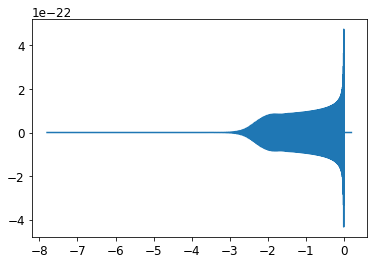

In [5]:
plt.plot(ht.sample_times, ht)
plt.show()

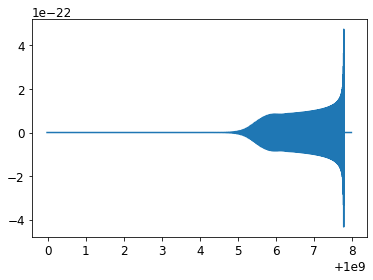

In [6]:
plt.plot(ht2.sample_times, ht2)
plt.show()

In [7]:
overlap = overlap(ht, ht2, psd=None, low_frequency_cutoff=30)
print("Overlap = {}".format(overlap))

Overlap = 0.9999995142559471


In [8]:
# Load the parameters list
parameters = pd.read_csv('./data/test_snr_gen/parameters.csv')
parameters_2 = pd.read_csv('./data/test_snr_gen_2/parameters.csv')

print(parameters['ra'])

0     0.216274
1     2.431438
2     0.626596
3     1.818143
4     5.147226
        ...   
95    3.077802
96    5.545679
97    4.607948
98    0.741530
99    5.545552
Name: ra, Length: 100, dtype: float64


In [9]:
h1_fp = []
h1_fc = []
h1_combined = []

h1 = Detector("H1")

ras = np.arange(start=0, stop=2*3.141, step=0.01)
decs = np.arange(start=-3.141/2, stop=3.141/2, step=0.01)

for dec in decs:
    temp_fps = []
    temp_fcs = []
    temp_comb = []
    for ra in ras:
        temp_fp, temp_fc = h1.antenna_pattern(ra, dec, 0.2, 1000000000)
        temp_fps.append(temp_fp)
        temp_fcs.append(temp_fc)
        temp_comb.append(temp_fp**2 + temp_fc**2)
    h1_fp.append(temp_fps)
    h1_fc.append(temp_fcs)
    h1_combined.append(temp_comb)

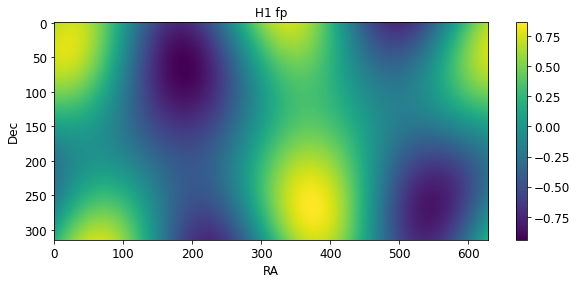

In [10]:
plt.figure(figsize=(10,4))
plt.imshow(h1_fp)
plt.colorbar()
plt.title("H1 fp")
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.grid()
# plt.xticks(list(range(len(fp[0]))), np.linspace(0,2*3.141,len(fp[0])))
plt.show()

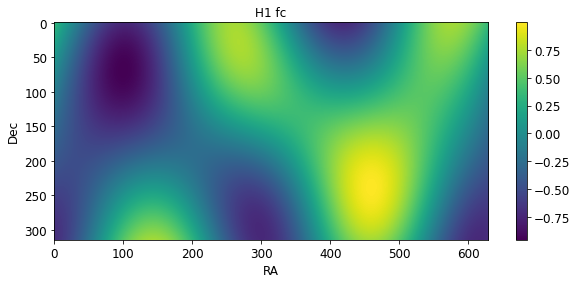

In [11]:
plt.figure(figsize=(10,4))
plt.imshow(h1_fc)
plt.colorbar()
plt.title("H1 fc")
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.grid()
plt.show()

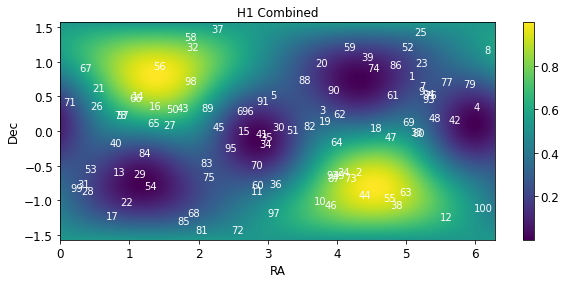

In [18]:
plt.figure(figsize=(10,4))
plt.imshow(h1_combined, extent=[0, 2*3.141, -3.141/2, 3.141/2])
# # for i in [3, 6, 9]:
# #     plt.text(parameters['ra'].iloc[i],parameters['dec'].iloc[i], str(i), ha="center", va="center", color='red')
# # for i in [1, 4, 5]:
for i in range(100):
# #     plt.scatter(parameters_2['ra'].iloc[i],parameters_2['dec'].iloc[i], color='white', marker='x', s=100)
    plt.text(parameters_2['ra'].iloc[i],parameters_2['dec'].iloc[i], str(i+1), ha="center", va="center", color='white')
plt.colorbar()
plt.title("H1 Combined")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()

In [13]:
l1_fp = []
l1_fc = []
l1_combined = []

l1 = Detector("L1")

ras = np.arange(start=0, stop=2*3.141, step=0.01)
decs = np.arange(start=-3.141/2, stop=3.141/2, step=0.01)

for dec in decs:
    temp_fps = []
    temp_fcs = []
    temp_comb = []
    for ra in ras:
        temp_fp, temp_fc = l1.antenna_pattern(ra, dec, 0.2, 1000000000)
        temp_fps.append(temp_fp)
        temp_fcs.append(temp_fc)
        temp_comb.append(temp_fp**2 + temp_fc**2)
    l1_fp.append(temp_fps)
    l1_fc.append(temp_fcs)
    l1_combined.append(temp_comb)

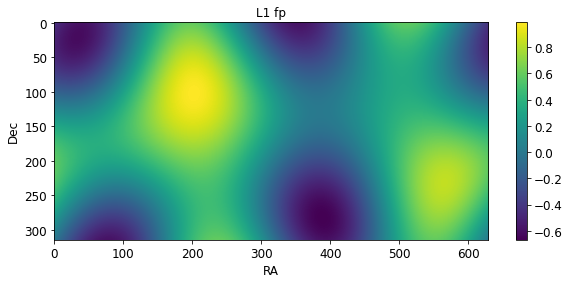

In [14]:
plt.figure(figsize=(10,4))
plt.imshow(l1_fp)
plt.colorbar()
plt.title("L1 fp")
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.grid()
# plt.xticks(list(range(len(fp[0]))), np.linspace(0,2*3.141,len(fp[0])))
plt.show()

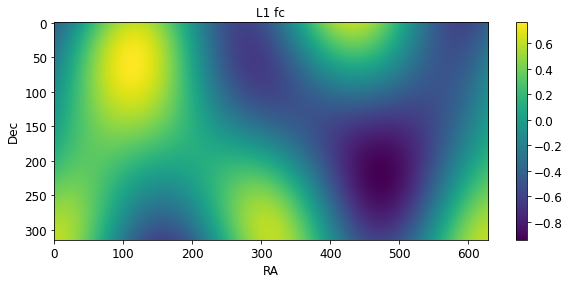

In [15]:
plt.figure(figsize=(10,4))
plt.imshow(l1_fc)
plt.colorbar()
plt.title("L1 fc")
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.grid()
# plt.xticks(list(range(len(fp[0]))), np.linspace(0,2*3.141,len(fp[0])))
plt.show()

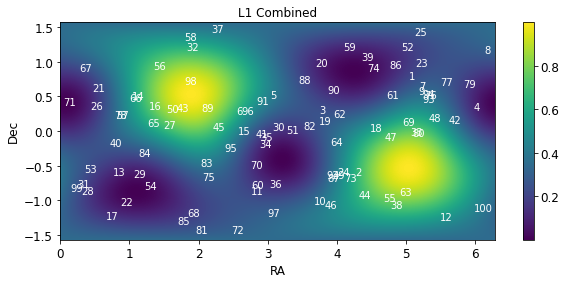

In [17]:
plt.figure(figsize=(10,4))
plt.imshow(l1_combined, extent=[0, 2*3.141, -3.141/2, 3.141/2])
# for i in range(10):
# # for i in [3, 6, 9]:
#     plt.text(parameters['ra'].iloc[i],parameters['dec'].iloc[i], str(i), ha="center", va="center", color='white')
# # for i in [1, 4, 5]:
for i in range(100):
# #     plt.scatter(parameters_2['ra'].iloc[i],parameters_2['dec'].iloc[i], color='white', marker='x', s=100)
    plt.text(parameters_2['ra'].iloc[i],parameters_2['dec'].iloc[i], str(i+1), ha="center", va="center", color='white')
plt.colorbar()
plt.title("L1 Combined")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.show()